## Assignment 4 — Correlation & Covariance Matrices with Heatmaps


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("E:/Engineering/Machine Learning/ADS-VAC/notebooks/datasets/housing.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Select Numeric Columns Only

(Correlation & covariance require numeric data)

In [3]:
numeric_df = df.select_dtypes(include=[np.number])

numeric_df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Compute Covariance Matrix

In [4]:
cov_matrix = numeric_df.cov()
cov_matrix


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,8.274629e+18,-1.770198e+13,3.441285e+06,1.143211e+07,-3.238447e+10,-1.574060e+13,2.877549e+07,-677205.124699,2.555378e+07,-4.451878e+07,2.749138e+07,-2.582659e+10,-6.557877e+09,1.806504e+09,-1.953526e+10,-1.265812e+09,-753702.190562,8.425548e+06,-5.719541e+09,-1.090150e+13
price,-1.770198e+13,1.347824e+11,1.052863e+05,1.484815e+05,2.367154e+08,1.363436e+09,5.090800e+04,8460.643387,1.117730e+05,8.687031e+03,2.880265e+05,1.841014e+08,5.261406e+07,5.824483e+05,1.864486e+07,-1.045072e+06,15617.422585,1.118118e+03,1.472964e+08,8.264591e+08
bedrooms,3.441285e+06,1.052863e+05,8.650150e-01,3.695271e-01,4.925960e+02,1.221324e+03,8.810446e-02,-0.000530,5.668416e-02,1.723221e-02,3.902536e-01,3.678361e+02,1.247599e+02,4.212004e+00,7.038678e+00,-7.597239e+00,-0.001151,1.695825e-02,2.496518e+02,7.426446e+02
bathrooms,1.143211e+07,1.484815e+05,3.695271e-01,5.931513e-01,5.338120e+02,2.798944e+03,2.082114e-01,0.004247,1.108004e-01,-6.263824e-02,6.020054e-01,4.370876e+02,9.672443e+01,1.144733e+01,1.569654e+01,-8.400840e+00,0.002622,2.419130e-02,3.001611e+02,1.833182e+03
sqft_living,-3.238447e+10,2.367154e+08,4.925960e+02,5.338120e+02,8.435337e+05,6.574684e+06,1.755404e+02,8.249461,2.003143e+02,-3.511460e+01,8.234077e+02,6.666978e+05,1.768358e+05,8.580238e+03,2.042442e+04,-9.800232e+03,6.685035,3.107108e+01,4.761601e+05,4.596302e+06
sqft_lot,-1.574060e+13,1.363436e+09,1.221324e+03,2.798944e+03,6.574684e+06,1.715659e+09,-1.163286e+02,77.418670,2.371393e+03,-2.414616e+02,5.531997e+03,6.294462e+06,2.802218e+05,6.458085e+04,1.271708e+05,-2.871637e+05,-491.766060,1.338837e+03,4.105319e+06,8.126540e+08
floors,2.877549e+07,5.090800e+04,8.810446e-02,2.082114e-01,1.755404e+02,-1.163286e+02,2.915880e-01,0.001107,1.218394e-02,-9.268648e-02,2.908243e-01,2.342603e+02,-5.871985e+01,7.761250e+00,1.374814e+00,-1.708121e+00,0.003712,9.537583e-03,1.035866e+02,-1.661524e+02
waterfront,-6.772051e+05,8.460643e+03,-5.296680e-04,4.247388e-03,8.249461e+00,7.741867e+01,1.107146e-03,0.007485,2.664300e-02,9.375805e-04,8.417993e-03,5.163720e+00,3.085741e+00,-6.648330e-02,3.227949e+00,1.401912e-01,-0.000171,-5.106370e-04,5.127103e+00,7.252979e+01
view,2.555378e+07,1.117730e+05,5.668416e-02,1.108004e-01,2.003143e+02,2.371393e+03,1.218394e-02,0.026643,5.872426e-01,2.293397e-02,2.263832e-01,1.063870e+02,9.392727e+01,-1.202897e+00,3.198718e+01,3.478060e+00,0.000654,-8.460837e-03,1.472943e+02,1.518526e+03
condition,-4.451878e+07,8.687031e+03,1.723221e-02,-6.263824e-02,-3.511460e+01,-2.414616e+02,-9.268648e-02,0.000938,2.293397e-02,4.234665e-01,-1.106640e-01,-8.525727e+01,5.014267e+01,-6.908312e+00,-1.584488e+01,1.053428e-01,-0.001347,-9.760027e-03,-4.140089e+01,-6.050935e+01


Covariance tells how two variables change together:

Positive covariance: both increase together

Negative covariance: one increases while the other decreases

Closer to 0: weak relationship

### Compute Correlation Matrix

In [5]:
corr_matrix = numeric_df.corr()
corr_matrix


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Correlation normalizes covariance to range [-1, 1]:

1.0 → perfect positive relationship

-1.0 → perfect negative relationship

0 → no linear relation

## Visualization

### Heatmap of Covariance Matrix

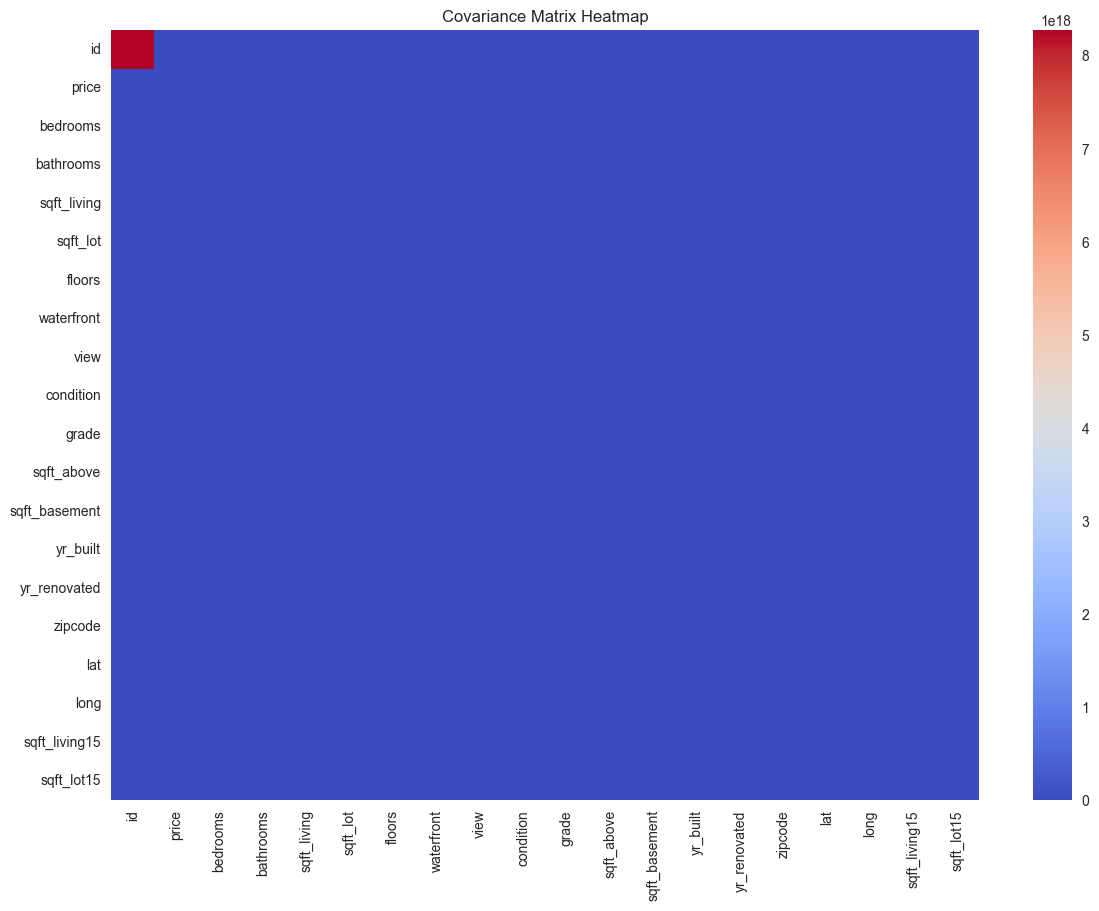

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(cov_matrix, cmap="coolwarm", annot=False)
plt.title("Covariance Matrix Heatmap")
plt.show()


Covariance values depend on scale of variables.
Example: sqft_lot is huge, so covariance with other columns may be large.

### Heatmap of Correlation Matrix

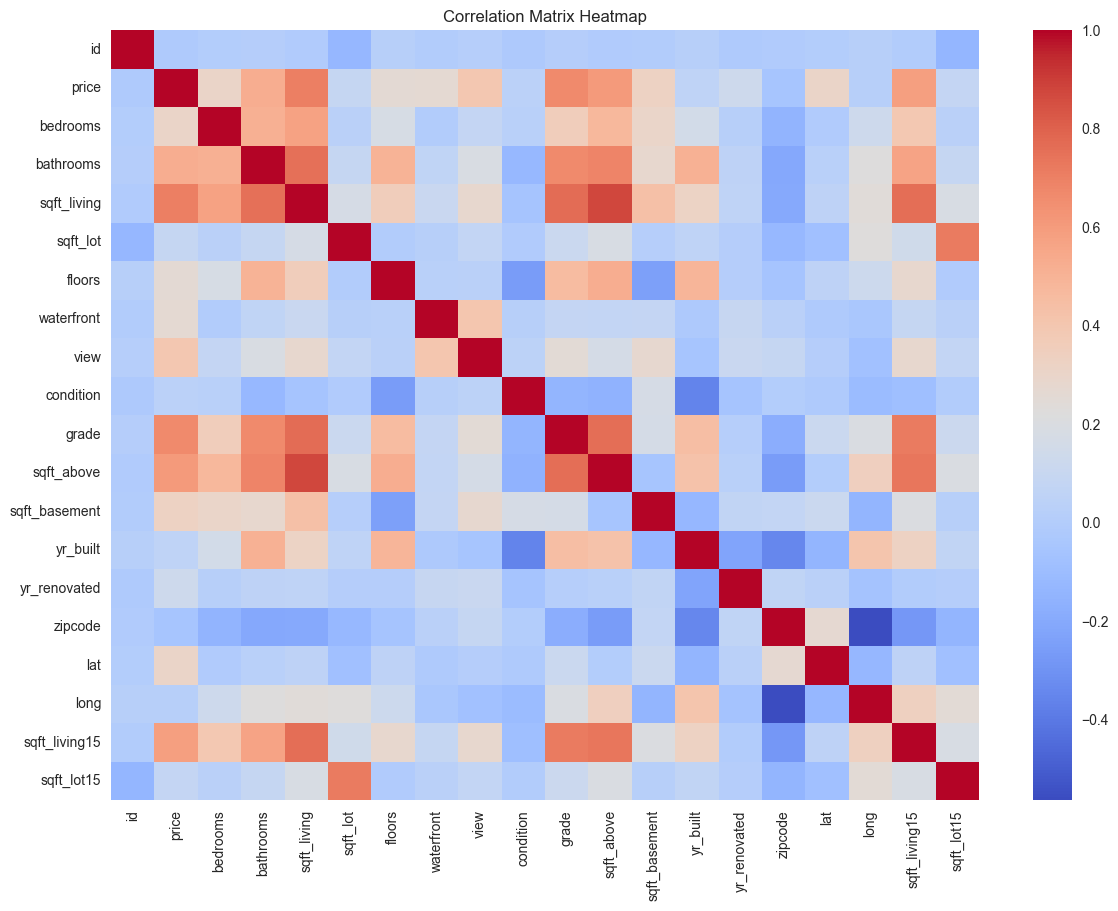

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()


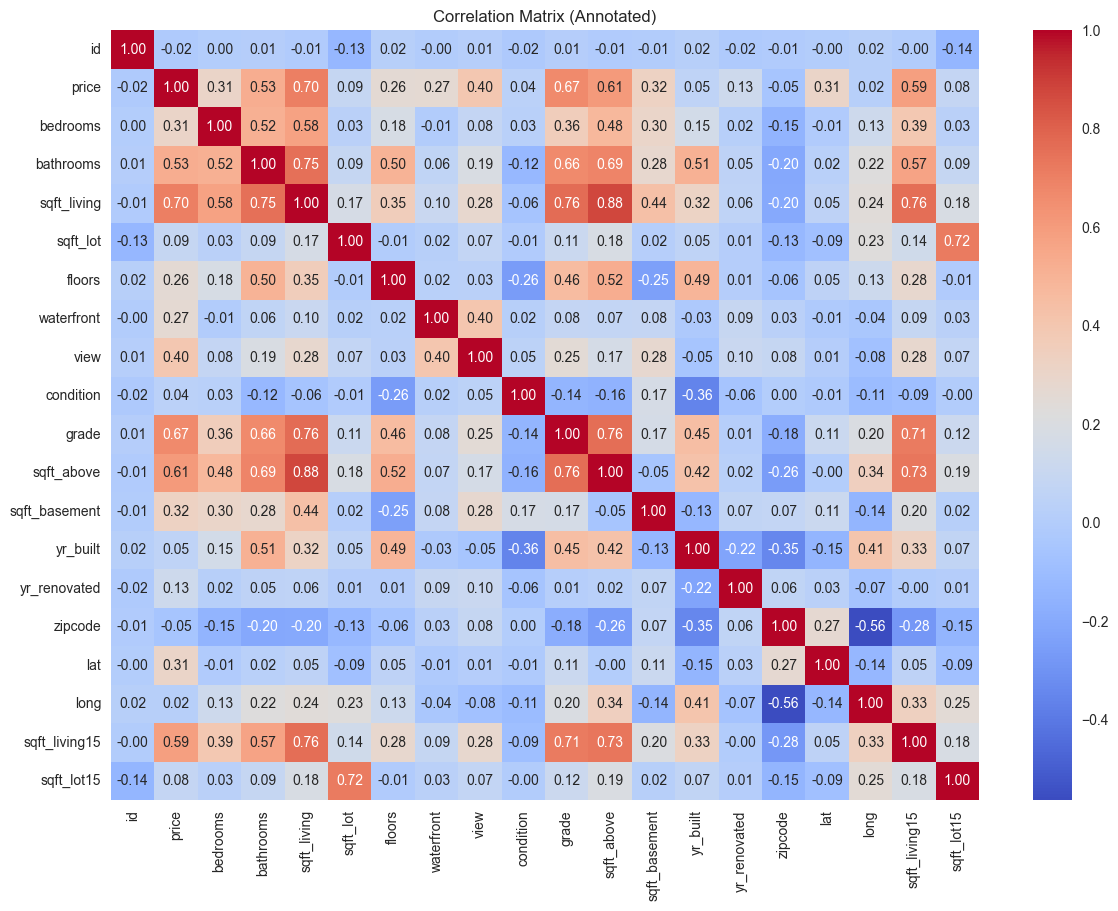

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix (Annotated)")
plt.show()


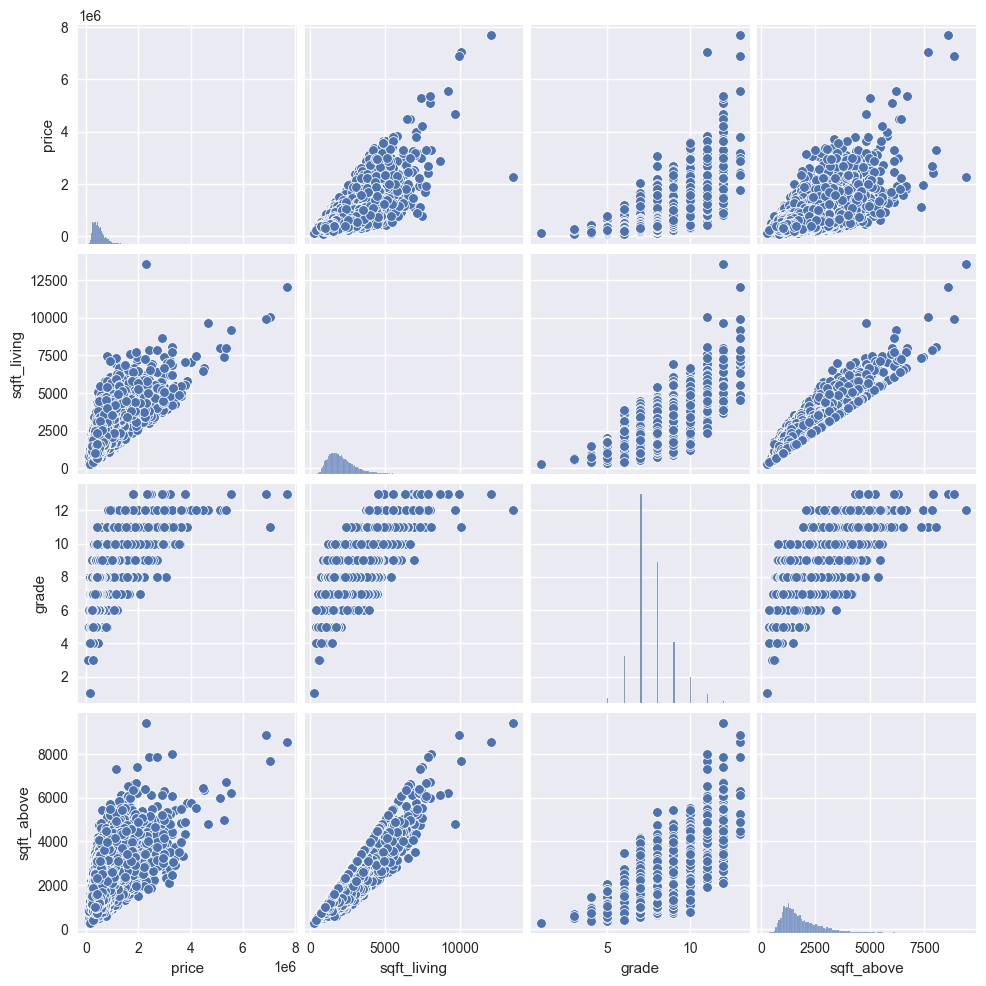

In [9]:
sns.pairplot(numeric_df[['price', 'sqft_living', 'grade', 'sqft_above']])
plt.show()
